In [6]:
from __future__ import print_function
import argparse
import torch
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR
from torchsummary import summary
use_cuda = torch.cuda.is_available()
torch.manual_seed(1)

device = torch.device("cuda" if use_cuda else "cpu")

In [7]:
class CnnNet(nn.Module):
    def __init__(self):
        super(CnnNet, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(5408, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output
    


In [8]:
model = CnnNet().to(device)
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
           Dropout-2           [-1, 32, 13, 13]               0
            Linear-3                  [-1, 128]         692,352
           Dropout-4                  [-1, 128]               0
            Linear-5                   [-1, 10]           1,290
Total params: 693,962
Trainable params: 693,962
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.21
Params size (MB): 2.65
Estimated Total Size (MB): 2.86
----------------------------------------------------------------


In [9]:
class CnnNet2(nn.Module):
    def __init__(self):
        super(CnnNet2, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(2704, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output
    

In [10]:
model = CnnNet2().to(device)
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
           Dropout-2           [-1, 16, 13, 13]               0
            Linear-3                  [-1, 128]         346,240
           Dropout-4                  [-1, 128]               0
            Linear-5                   [-1, 10]           1,290
Total params: 347,690
Trainable params: 347,690
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.11
Params size (MB): 1.33
Estimated Total Size (MB): 1.43
----------------------------------------------------------------


In [11]:
class CnnNet3(nn.Module):
    def __init__(self):
        super(CnnNet3, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(2704, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        output = F.log_softmax(x, dim=1)
        return output
    

In [12]:
model = CnnNet3().to(device)
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
           Dropout-2           [-1, 16, 13, 13]               0
            Linear-3                   [-1, 10]          27,050
Total params: 27,210
Trainable params: 27,210
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.10
Params size (MB): 0.10
Estimated Total Size (MB): 0.21
----------------------------------------------------------------


In [13]:
class CnnNet4(nn.Module):
    def __init__(self):
        super(CnnNet4, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(2704, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [14]:
model = CnnNet4().to(device)
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
           Dropout-2           [-1, 16, 13, 13]               0
            Linear-3                  [-1, 512]       1,384,960
           Dropout-4                  [-1, 512]               0
            Linear-5                   [-1, 10]           5,130
Total params: 1,390,250
Trainable params: 1,390,250
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.11
Params size (MB): 5.30
Estimated Total Size (MB): 5.42
----------------------------------------------------------------


In [15]:
class CnnNet5(nn.Module):
    def __init__(self):
        super(CnnNet5, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(4608, 256)
        self.fc2 = nn.Linear(256, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [16]:
model = CnnNet5().to(device)
summary(model,(1,28,28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
            Conv2d-2           [-1, 32, 24, 24]           4,640
           Dropout-3           [-1, 32, 12, 12]               0
            Linear-4                  [-1, 256]       1,179,904
           Dropout-5                  [-1, 256]               0
            Linear-6                   [-1, 10]           2,570
Total params: 1,187,274
Trainable params: 1,187,274
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.26
Params size (MB): 4.53
Estimated Total Size (MB): 4.79
----------------------------------------------------------------


In [17]:
class CnnNet6(nn.Module):
    def __init__(self):
        super(CnnNet6, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1)
        self.conv2 = nn.Conv2d(16, 32, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(4608, 512)
        self.fc2 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

In [18]:
model = CnnNet6().to(device)
summary(model,(1,28,28))
    

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 16, 26, 26]             160
            Conv2d-2           [-1, 32, 24, 24]           4,640
           Dropout-3           [-1, 32, 12, 12]               0
            Linear-4                  [-1, 512]       2,359,808
           Dropout-5                  [-1, 512]               0
            Linear-6                   [-1, 10]           5,130
Total params: 2,369,738
Trainable params: 2,369,738
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.27
Params size (MB): 9.04
Estimated Total Size (MB): 9.31
----------------------------------------------------------------


In [8]:
def train( model, device, train_loader, optimizer,loss_fn, epoch):
    train_loss=0
    model.train()
    correct = 0
    loss_fn = nn.CrossEntropyLoss(reduction='sum')
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = loss_fn(output, target)
        train_loss+=loss.item()
        loss.backward()
        optimizer.step()
        pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
        correct += pred.eq(target.view_as(pred)).sum().item()
    train_loss /= len(train_loader.dataset)
    print("Training - Epoch:", epoch, "loss:", train_loss, "accuracy:", 100. * correct / len(train_loader.dataset))  
    return train_loss, 100. * correct / len(train_loader.dataset)

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    loss_fn = nn.CrossEntropyLoss(reduction='sum')
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += loss_fn(output, target)  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))
    return test_loss, 100. * correct / len(test_loader.dataset)




In [9]:
use_cuda = torch.cuda.is_available()
torch.manual_seed(1)

device = torch.device("cuda" if use_cuda else "cpu")

train_kwargs = {'batch_size': 512}
test_kwargs = {'batch_size': 512}
if use_cuda:
    cuda_kwargs = {'num_workers': 1,
                   'pin_memory': True,
                   'shuffle': True}
    train_kwargs.update(cuda_kwargs)
    test_kwargs.update(cuda_kwargs)

transform=transforms.Compose([
        transforms.ToTensor()
        ])
dataset1 = datasets.MNIST('../data', train=True, download=True, transform=transform)
dataset2 = datasets.MNIST('../data', train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(dataset1,**train_kwargs)
test_loader = torch.utils.data.DataLoader(dataset2, **test_kwargs)



In [10]:
def returnModelAccAndLoss(model, device, train_loader, test_loader, optimizer, loss, epoch, scheduler):
    train_loss=[]
    test_loss=[]
    accuracy_train=[]
    accuracy_test=[]
    for epoch in range(1, epoch+1):
        tr_loss, tr_accuracy=train(model, device, train_loader, optimizer, loss, epoch)
        train_loss.append(tr_loss)
        accuracy_train.append(tr_accuracy)
        tst_loss, tst_accuracy = test(model, device, test_loader)
        test_loss.append(tst_loss)
        accuracy_test.append(tst_accuracy)
        #scheduler.step()
    return train_loss, accuracy_train, test_loss, accuracy_test

In [11]:
epoch=100
model = CnnNet().to(device)
pytorch_total_params = sum(p.numel() for p in model.parameters())
print(pytorch_total_params)
optimizer = optim.Adadelta(model.parameters(), lr=0.01)
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)
loss = nn.CrossEntropyLoss()
train_loss_1, accuracy_train_1, test_loss_1, test_accuracy_1 = returnModelAccAndLoss(model, device, train_loader, test_loader, optimizer, loss, epoch, scheduler)

    

693962
Training - Epoch: 1 loss: 1.790820398203532 accuracy: 53.135

Test set: Average loss: 1.1104, Accuracy: 8102/10000 (81%)

Training - Epoch: 2 loss: 0.8813461731592814 accuracy: 77.04333333333334

Test set: Average loss: 0.5339, Accuracy: 8811/10000 (88%)

Training - Epoch: 3 loss: 0.5782252535502116 accuracy: 83.60666666666667

Test set: Average loss: 0.3934, Accuracy: 9042/10000 (90%)

Training - Epoch: 4 loss: 0.4810165751139323 accuracy: 86.04333333333334

Test set: Average loss: 0.3382, Accuracy: 9135/10000 (91%)

Training - Epoch: 5 loss: 0.43151773935953774 accuracy: 87.59833333333333

Test set: Average loss: 0.3077, Accuracy: 9188/10000 (92%)

Training - Epoch: 6 loss: 0.40016012566884357 accuracy: 88.36166666666666

Test set: Average loss: 0.2865, Accuracy: 9237/10000 (92%)

Training - Epoch: 7 loss: 0.3762335540771484 accuracy: 88.90333333333334

Test set: Average loss: 0.2706, Accuracy: 9247/10000 (92%)

Training - Epoch: 8 loss: 0.3597145875295003 accuracy: 89.5016666

In [12]:
epoch=100
model = CnnNet2().to(device)
model2_params = sum(p.numel() for p in model.parameters())
optimizer = optim.Adadelta(model.parameters(), lr=1)
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)
loss = nn.CrossEntropyLoss()
train_loss_2, accuracy_train_2, test_loss_2, test_accuracy_2 = returnModelAccAndLoss(model, device, train_loader, test_loader, optimizer, loss, epoch, scheduler)
    

Training - Epoch: 1 loss: 0.6820473617553711 accuracy: 77.87166666666667

Test set: Average loss: 0.1759, Accuracy: 9464/10000 (95%)

Training - Epoch: 2 loss: 0.23565664033889772 accuracy: 93.02166666666666

Test set: Average loss: 0.0983, Accuracy: 9697/10000 (97%)

Training - Epoch: 3 loss: 0.1676724850098292 accuracy: 94.97666666666667

Test set: Average loss: 0.0770, Accuracy: 9746/10000 (97%)

Training - Epoch: 4 loss: 0.13223248626391093 accuracy: 95.94666666666667

Test set: Average loss: 0.0602, Accuracy: 9793/10000 (98%)

Training - Epoch: 5 loss: 0.11629669346014658 accuracy: 96.55166666666666

Test set: Average loss: 0.0606, Accuracy: 9790/10000 (98%)

Training - Epoch: 6 loss: 0.10282802509466807 accuracy: 96.99333333333334

Test set: Average loss: 0.0547, Accuracy: 9820/10000 (98%)

Training - Epoch: 7 loss: 0.0905383253733317 accuracy: 97.22333333333333

Test set: Average loss: 0.0531, Accuracy: 9825/10000 (98%)

Training - Epoch: 8 loss: 0.08362468538284301 accuracy: 97

In [22]:
epoch=100
model = CnnNet3().to(device)
model3_params = sum(p.numel() for p in model.parameters())
optimizer = optim.Adadelta(model.parameters(), lr=1)
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)
loss = nn.CrossEntropyLoss()
train_loss_3, accuracy_train_3, test_loss_3, test_accuracy_3 = returnModelAccAndLoss(model, device, train_loader, test_loader, optimizer, loss, epoch, scheduler)
    

Training - Epoch: 1 loss: 0.5479920604070028 accuracy: 82.67

Test set: Average loss: 0.2395, Accuracy: 9273/10000 (93%)

Training - Epoch: 2 loss: 0.2061085606098175 accuracy: 93.87333333333333

Test set: Average loss: 0.1354, Accuracy: 9614/10000 (96%)

Training - Epoch: 3 loss: 0.14129106918970744 accuracy: 95.83666666666667

Test set: Average loss: 0.1048, Accuracy: 9677/10000 (97%)

Training - Epoch: 4 loss: 0.11082885449727377 accuracy: 96.72

Test set: Average loss: 0.0776, Accuracy: 9765/10000 (98%)

Training - Epoch: 5 loss: 0.09333309355576833 accuracy: 97.27666666666667

Test set: Average loss: 0.0755, Accuracy: 9780/10000 (98%)

Training - Epoch: 6 loss: 0.08540583364963532 accuracy: 97.49333333333334

Test set: Average loss: 0.0636, Accuracy: 9789/10000 (98%)

Training - Epoch: 7 loss: 0.07727318857510884 accuracy: 97.67166666666667

Test set: Average loss: 0.0640, Accuracy: 9795/10000 (98%)

Training - Epoch: 8 loss: 0.07072202070951462 accuracy: 97.84666666666666

Test s

In [14]:
epoch=100
model = CnnNet4().to(device)
model4_params = sum(p.numel() for p in model.parameters())
optimizer = optim.Adadelta(model.parameters(), lr=1)
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)
loss = nn.CrossEntropyLoss()
train_loss_4, accuracy_train_4, test_loss_4, test_accuracy_4 = returnModelAccAndLoss(model, device, train_loader, test_loader, optimizer, loss, epoch, scheduler)



Training - Epoch: 1 loss: 0.5980066206296285 accuracy: 80.57333333333334

Test set: Average loss: 0.1276, Accuracy: 9614/10000 (96%)

Training - Epoch: 2 loss: 0.16549663623174032 accuracy: 94.91333333333333

Test set: Average loss: 0.0738, Accuracy: 9758/10000 (98%)

Training - Epoch: 3 loss: 0.10732036418914795 accuracy: 96.775

Test set: Average loss: 0.0571, Accuracy: 9817/10000 (98%)

Training - Epoch: 4 loss: 0.08221105495889981 accuracy: 97.525

Test set: Average loss: 0.0474, Accuracy: 9836/10000 (98%)

Training - Epoch: 5 loss: 0.06837663218975067 accuracy: 97.90166666666667

Test set: Average loss: 0.0397, Accuracy: 9871/10000 (99%)

Training - Epoch: 6 loss: 0.055878142638504505 accuracy: 98.285

Test set: Average loss: 0.0369, Accuracy: 9876/10000 (99%)

Training - Epoch: 7 loss: 0.04839512972831726 accuracy: 98.495

Test set: Average loss: 0.0348, Accuracy: 9889/10000 (99%)

Training - Epoch: 8 loss: 0.04306376005411148 accuracy: 98.665

Test set: Average loss: 0.0361, Acc

In [23]:
epoch=100
model = CnnNet5().to(device)
model5_params = sum(p.numel() for p in model.parameters())
optimizer = optim.Adadelta(model.parameters(), lr=1)
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)
loss = nn.CrossEntropyLoss()
train_loss_5, accuracy_train_5, test_loss_5, test_accuracy_5 = returnModelAccAndLoss(model, device, train_loader, test_loader, optimizer, loss, epoch, scheduler)



Training - Epoch: 1 loss: 0.4065330081701279 accuracy: 87.17833333333333

Test set: Average loss: 0.0641, Accuracy: 9792/10000 (98%)

Training - Epoch: 2 loss: 0.081998522011439 accuracy: 97.53666666666666

Test set: Average loss: 0.0403, Accuracy: 9862/10000 (99%)

Training - Epoch: 3 loss: 0.055378232089678445 accuracy: 98.32833333333333

Test set: Average loss: 0.0326, Accuracy: 9883/10000 (99%)

Training - Epoch: 4 loss: 0.04654177349408468 accuracy: 98.61833333333334

Test set: Average loss: 0.0316, Accuracy: 9893/10000 (99%)

Training - Epoch: 5 loss: 0.03767487826347351 accuracy: 98.82666666666667

Test set: Average loss: 0.0297, Accuracy: 9895/10000 (99%)

Training - Epoch: 6 loss: 0.03344199840227763 accuracy: 98.95166666666667

Test set: Average loss: 0.0275, Accuracy: 9910/10000 (99%)

Training - Epoch: 7 loss: 0.028206373765071232 accuracy: 99.15166666666667

Test set: Average loss: 0.0252, Accuracy: 9909/10000 (99%)

Training - Epoch: 8 loss: 0.02575851695140203 accuracy: 

In [24]:
epoch=100
model = CnnNet6().to(device)
model6_params = sum(p.numel() for p in model.parameters())
optimizer = optim.Adadelta(model.parameters(), lr=1)
scheduler = StepLR(optimizer, step_size=1, gamma=0.1)
loss = nn.CrossEntropyLoss()
train_loss_6, accuracy_train_6, test_loss_6, test_accuracy_6 = returnModelAccAndLoss(model, device, train_loader, test_loader, optimizer, loss, epoch, scheduler)


Training - Epoch: 1 loss: 0.4230681296666463 accuracy: 86.86666666666666

Test set: Average loss: 0.0687, Accuracy: 9778/10000 (98%)

Training - Epoch: 2 loss: 0.07892294031778971 accuracy: 97.58333333333333

Test set: Average loss: 0.0438, Accuracy: 9849/10000 (98%)

Training - Epoch: 3 loss: 0.05457811172008514 accuracy: 98.27833333333334

Test set: Average loss: 0.0316, Accuracy: 9896/10000 (99%)

Training - Epoch: 4 loss: 0.03883043236732483 accuracy: 98.73833333333333

Test set: Average loss: 0.0323, Accuracy: 9890/10000 (99%)

Training - Epoch: 5 loss: 0.03354357192516327 accuracy: 98.98333333333333

Test set: Average loss: 0.0259, Accuracy: 9913/10000 (99%)

Training - Epoch: 6 loss: 0.02808244196251035 accuracy: 99.12333333333333

Test set: Average loss: 0.0266, Accuracy: 9908/10000 (99%)

Training - Epoch: 7 loss: 0.023107887424031893 accuracy: 99.27

Test set: Average loss: 0.0276, Accuracy: 9915/10000 (99%)

Training - Epoch: 8 loss: 0.019807343762119612 accuracy: 99.3466666

In [25]:
train_parameters=dict()
sum(p.numel() for p in model.parameters())
model_parameters=[ sum(p.numel() for p in CnnNet().parameters()), sum(p.numel() for p in CnnNet2().parameters()),
                  sum(p.numel() for p in CnnNet3().parameters()), sum(p.numel() for p in CnnNet4().parameters()),
                  sum(p.numel() for p in CnnNet5().parameters()), sum(p.numel() for p in CnnNet6().parameters())]
train_parameters[model_parameters[0]]=[accuracy_train_1[-1], test_accuracy_1[-1]]
train_parameters[model_parameters[1]]=[accuracy_train_2[-1], test_accuracy_2[-1]]
train_parameters[model_parameters[2]]= [accuracy_train_3[-1], test_accuracy_3[-1]]
train_parameters[model_parameters[3]]= [accuracy_train_4[-1], test_accuracy_4[-1]]
train_parameters[model_parameters[4]]= [accuracy_train_5[-1], test_accuracy_5[-1]]
train_parameters[model_parameters[5]]= [accuracy_train_6[-1], test_accuracy_6[-1]]

693962
[0.05098609790007273, 0.05023577457666397, 0.05204939595858256, 0.04862858276367187, 0.049204388658205665, 0.05224372126261393]
[3469810]
[(27210, 0.02319172476331393), (347690, 0.05224372126261393), (1187274, 0.018476497933268547), (1390250, 0.021659483379187685), (2369738, 0.0019471162048278832)]


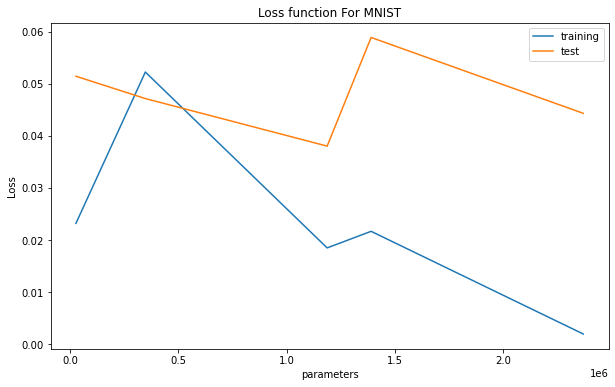

In [26]:
train_loss=[ train_loss_1[-1], train_loss_2[-1], train_loss_3[-1],train_loss_4[-1], train_loss_5[-1]]
test_loss = [ test_loss_1[-1], test_loss_2[-1],test_loss_3[-1], test_loss_4[-1], test_loss_5[-1]]
print(model_parameters[0])
import matplotlib.pyplot as plt
plt1=plt.figure(figsize=(10, 6))

print(train_loss_2[-7:-1])
print([model_parameters[0]*5])
n=1
parameters=[model_parameters[1]]*n + [model_parameters[2]]*n + [model_parameters[3]]*n+ [model_parameters[4]]*n + [model_parameters[5]]*n
#parameters
train_losses=train_loss_2[-n-1:-1] + train_loss_3[-n-1:-1] + train_loss_4[-n-1:-1] + train_loss_5[-n-1:-1] + train_loss_6[-n-1:-1]
#train_losses
train_param_zip=zip(parameters, train_losses)
train_parm= list(train_param_zip)
train_parm.sort(key=lambda x: x[0])
print(train_parm)

test_parmaters=[model_parameters[1]]*n + [model_parameters[2]]*n +[model_parameters[3]]*n+ [model_parameters[4]]*n + [model_parameters[5]]*n
test_losses=test_loss_2[-n-1:-1] + test_loss_3[-n-1:-1] + test_loss_4[-n-1:-1] + test_loss_5[-n-1:-1] +  test_loss_6[-n-1:-1]
test_param_zip=zip(test_parmaters, test_losses)
test_param=list(test_param_zip)
test_param.sort(key=lambda x: x[0])

plt.plot(np.array( [ t[0] for t in train_parm]),
            np.array( [ t[1] for t in train_parm] ), label='training')
plt.plot(np.array( [ t[0] for t in test_param]),
            np.array( [ t[1] for t in test_param] ), label='test')

# naming the x axis
plt.xlabel('parameters')
# naming the y axis
plt.ylabel('Loss') 
plt.legend()
plt.title("Loss function For MNIST")
plt.show()





[99.22, 98.61166666666666, 99.59333333333333, 99.43, 99.95166666666667]


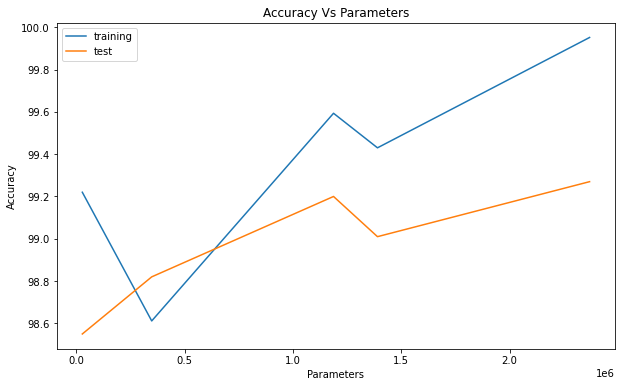

In [27]:
train_parameters_sort=[]
train_acc=[]
test_acc=[]
train_parameters
for p in sorted(train_parameters):
    train_parameters_sort.append(p)
    train_acc.append(train_parameters[p][0])
    test_acc.append(train_parameters[p][1])
train_acc.pop(2)
test_acc.pop(2)
train_parameters_sort.pop(2)
print(train_acc)
plt1=plt.figure(figsize=(10, 6))
plt.plot(np.array(train_parameters_sort),np.array(train_acc), label='training')
plt.plot(np.array(train_parameters_sort),np.array(test_acc), label='test')

# naming the x axis
plt.xlabel('Parameters')
# naming the y axis
plt.ylabel('Accuracy') 
plt.legend()
plt.title("Accuracy Vs Parameters")
plt.show()
